In [98]:
import torch

print(torch.__version__)

2.0.1+cu118


In [99]:
# 测试GPU是否可用.
print(torch.cuda.is_available())
print(torch.cuda.get_device_name())

True
NVIDIA GeForce GTX 1650


#### 创建张量

In [100]:
import torch
import numpy as np

np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(type(a), type(b))
print(type(t_a), type(t_b))
print(t_a, t_b)

<class 'list'> <class 'numpy.ndarray'>
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1, 2, 3]) tensor([4, 5, 6], dtype=torch.int32)


In [101]:
# 查看b和t_b的形状.
print(b.shape, t_b.shape)

(3,) torch.Size([3])


In [102]:
t_ones = torch.ones(2, 3)
t_ones.shape

torch.Size([2, 3])

In [103]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [104]:
# 创建一个由随机数组成的张量.
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.6085, 0.9314, 0.8313],
        [0.8116, 0.8553, 0.8163]])


In [105]:
print(rand_tensor.mean(), rand_tensor.std())

tensor(0.8091) tensor(0.1076)


#### 更改张量形状与数据类型

In [106]:
# torch.to方法可以更改张量数据类型.
t_a_new = t_a.to(torch.int64)
print(t_a.dtype, t_a_new.dtype)

torch.int64 torch.int64


In [107]:
t_b_new = t_b.to(torch.int64)
print(t_b.dtype, t_b_new.dtype)

torch.int32 torch.int64


In [108]:
# 张量形状操作.
"""
 * (Tensor input, int dim0, int dim1)
 * (Tensor input, name dim0, name dim1)
"""
# t = torch.rand(3, 5)
# t_tr = torch.transpose(t)
# t_tr


"""
TypeError                                 Traceback (most recent call last)
Cell In[11], line 7
      2 '''
      3  * (Tensor input, int dim0, int dim1)
      4  * (Tensor input, name dim0, name dim1)
      5 '''
      6 t = torch.rand(3, 5)
----> 7 t_tr = torch.transpose(t)
      8 t_tr

TypeError: transpose() received an invalid combination of arguments - got (Tensor), but expected one of:
 * (Tensor input, int dim0, int dim1)
 * (Tensor input, name dim0, name dim1)
"""

"\nTypeError                                 Traceback (most recent call last)\nCell In[11], line 7\n      2 '''\n      3  * (Tensor input, int dim0, int dim1)\n      4  * (Tensor input, name dim0, name dim1)\n      5 '''\n      6 t = torch.rand(3, 5)\n----> 7 t_tr = torch.transpose(t)\n      8 t_tr\n\nTypeError: transpose() received an invalid combination of arguments - got (Tensor), but expected one of:\n * (Tensor input, int dim0, int dim1)\n * (Tensor input, name dim0, name dim1)\n"

In [109]:
t = torch.rand(3, 5)
print(t)
# 0 和 1 表示要交换的维度；
# 这里将行和列进行交换，得到一个形状为 (5, 3) 的新张量.
t_tr = torch.transpose(t, 0, 1)
t_tr

tensor([[0.6291, 0.1581, 0.0801, 0.2709, 0.4418],
        [0.1935, 0.6829, 0.6547, 0.3868, 0.6922],
        [0.6616, 0.8053, 0.8367, 0.3307, 0.9885]])


tensor([[0.6291, 0.1935, 0.6616],
        [0.1581, 0.6829, 0.8053],
        [0.0801, 0.6547, 0.8367],
        [0.2709, 0.3868, 0.3307],
        [0.4418, 0.6922, 0.9885]])

In [110]:
print(t.shape, '---->', t_tr.shape)

torch.Size([3, 5]) ----> torch.Size([5, 3])


In [111]:
# reshape一个张量.
t = torch.zeros(30)
print(t.shape)

t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([30])
torch.Size([5, 6])


In [112]:
print(t_reshape.size)

<built-in method size of Tensor object at 0x00000271B9DBC9A0>


In [113]:
print(t_reshape.size())

torch.Size([5, 6])


In [114]:
# 移除无用的维度.
t = torch.zeros(1, 2, 1, 4, 1)
print(t.shape)

t_sqz = torch.squeeze(t, 2)
print(t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])
torch.Size([1, 2, 4, 1])


#### 对张量执行数学运算

In [115]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2  = torch.normal(mean=0, std=1, size=(5, 2))
# t1, t2的shape相同，执行元素级乘法.
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [116]:
# 计算均值、标准差.
print(t1)
t4 = torch.mean(t1, axis=1)
print(t4)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([ 0.0369,  0.1378, -0.1709,  0.1515,  0.0083])


In [117]:
print(t1)
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([-0.1373,  0.2028])


In [118]:
print(t1)
print(t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


In [119]:
# 计算矩阵乘法.
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [120]:
# 计算Lp范数.
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


#### 拆分、堆叠和拼接张量

In [121]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)

t_splits = torch.chunk(t, 3)
print(type(t_splits))
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])
<class 'tuple'>


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [122]:
for item in t_splits:
    print(item)
    print(item.numpy())

tensor([0.7576, 0.2793])
[0.758 0.279]
tensor([0.4031, 0.7347])
[0.403 0.735]
tensor([0.0293, 0.7999])
[0.029 0.8  ]


In [123]:
torch.manual_seed(1)
t = torch.rand(5)

t_splits = torch.chunk(t, 3)
print(type(t_splits))
[item.numpy() for item in t_splits]

<class 'tuple'>


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029], dtype=float32)]

In [124]:
# 提供一个需要分割得到的size.
torch.manual_seed(1)
t = torch.rand(5)
print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [125]:
# 拼接.
A = torch.ones(3)
B = torch.zeros(3)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0., 0.])


In [126]:
A = torch.ones(3)
B = torch.zeros(3)

C = torch.stack([A, B], axis=1)
print(C)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


#### 使用Pytorch创建输入管道

In [127]:
# 从张量创建Pytorch DataLoader.
import torch
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [128]:
# 从上述数据集创建batches.
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


In [129]:
# 将两个张量组合成数据集.
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [130]:
# Create a joint dataset.
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [131]:
"""
一个自定义的Dataset class不要包含有：

    * __init__(): 这是初始逻辑发生的地方，例如读取现有数组、加载文件、过滤数据等;

    * __getitem__(): 用于返回给定索引对应的样本;
"""

# 创建一个joint dataset.
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

In [132]:
# 打印每个样本.
for example in joint_dataset:
    print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


In [133]:
"""
如果第二个数据集是张量形式的标记数据集， 可以简单实现如下：
"""
joint_dataset = TensorDataset(t_x, t_y)

#### Shuffle, batch, repeat

In [134]:
torch.manual_seed(1)

data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n    y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
    y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
    y: tensor([1, 3])


In [135]:
"""
从上述结果可以看出，数据行被打乱，但是保持了x和y的对应关系.
在历经多个Epochs模型训练时，示例如下：
"""
for epoch in range(2):
    print(f'epoch {epoch + 1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n    y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
    y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
    y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
    y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
    y: tensor([0, 1])


#### 从本地磁盘文件创建数据集

In [136]:
import pathlib

imgdir_path = pathlib.Path('../Python-MachineLearning/Datasets/cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['..\\Python-MachineLearning\\Datasets\\cat_dog_images\\cat-01.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\cat-02.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\cat-03.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\dog-01.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\dog-02.jpg', '..\\Python-MachineLearning\\Datasets\\cat_dog_images\\dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


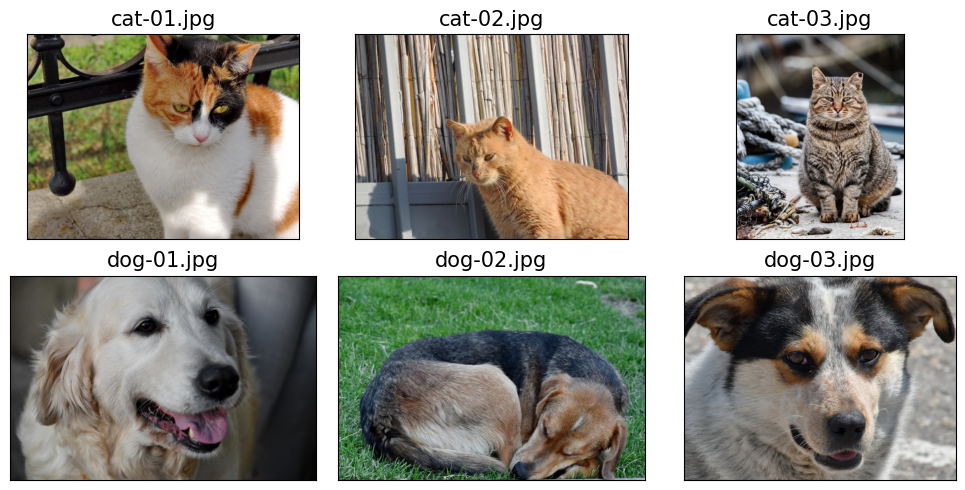

In [137]:
# 可视化.
import matplotlib.pyplot as plt
import os 
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    """
    os.path.basename用于获取字符串中的基本文件名部分.
    返回路径中最后一个斜杠“\或者/”之后的部分,即文件名.
    """
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

从上图中可以看出，图片的标签位于图片文件名中，同时各图像大小尺寸不一致.

In [138]:
labels = [1 if 'dog' in 
            os.path.basename(file) else 0
                for file in file_list]

print(labels)

[0, 0, 0, 1, 1, 1]


In [139]:
# 创建一个joint dataset.
# list of filenames and their labels.
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    
    def __len__(self):
        return len(self.labels)

In [140]:
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

..\Python-MachineLearning\Datasets\cat_dog_images\cat-01.jpg 0
..\Python-MachineLearning\Datasets\cat_dog_images\cat-02.jpg 0
..\Python-MachineLearning\Datasets\cat_dog_images\cat-03.jpg 0
..\Python-MachineLearning\Datasets\cat_dog_images\dog-01.jpg 1
..\Python-MachineLearning\Datasets\cat_dog_images\dog-02.jpg 1
..\Python-MachineLearning\Datasets\cat_dog_images\dog-03.jpg 1


In [141]:
# 数据变换.
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Resize((img_height, img_width))])

In [142]:
# 在上述数据集创建代码快中添加自定义的DataTransform.
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels, transform)

In [143]:
print(image_dataset)
print(type(image_dataset))

<class '__main__.ImageDataset'>


d:\installation\Anaconda3\envs\xy_ultra\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


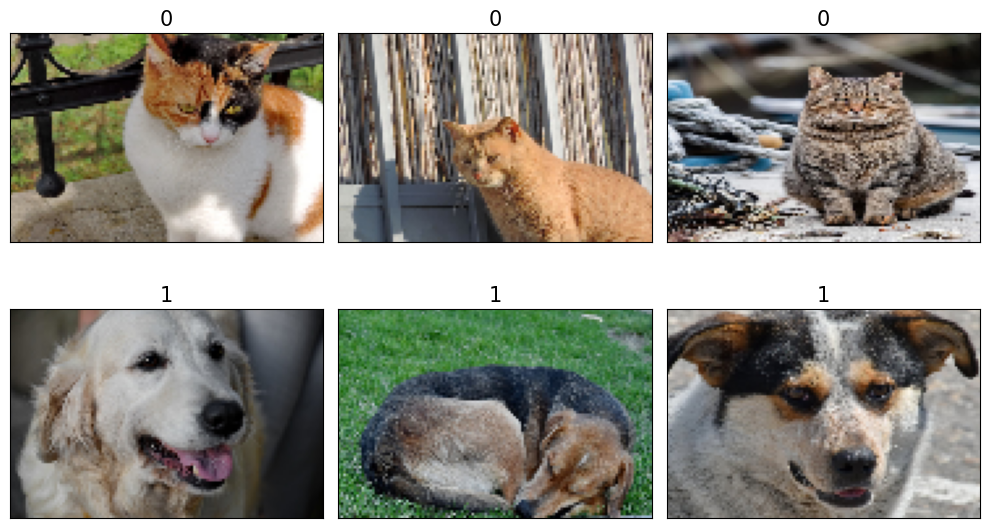

In [144]:
# 在此可视化处理之后的数据.
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose(1, 2, 0))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
plt.show()

#### 从torchvision.datasets库中读取已有数据

##### celebA数据集

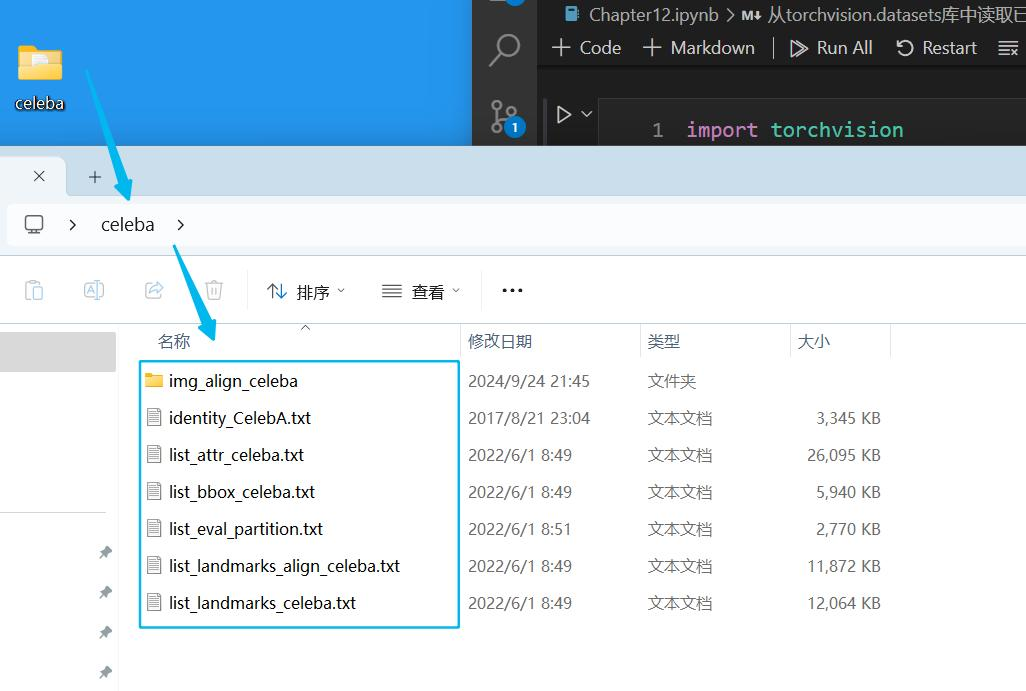

In [145]:
# 数据手动下载，放置于桌面，目录结构.
# https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
from IPython.display import Image

Image(filename='../Python-MachineLearning/Attached_images/Chapter12/figures/16646.jpg', 
      width=450)

In [146]:
import torchvision

# image_path = '../Python-MachineLearning/Datasets'
image_path = "D:/python_code/7spyder_projects/2024celeba"
celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', 
                                             target_type='attr', 
                                             download=False)

In [147]:
# 检查数据集是否属于torch.utils.data.Dataset类.
"""
assert 是一个用于调试的语句，如果后面的条件为False ，程序会抛出一个 AssertionError异常.
这通常用于确保某些条件在代码运行时成立.
"""
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [148]:
# 上述数据已经划分为训练集、测试集和验证集.
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x271B9D0DB80>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


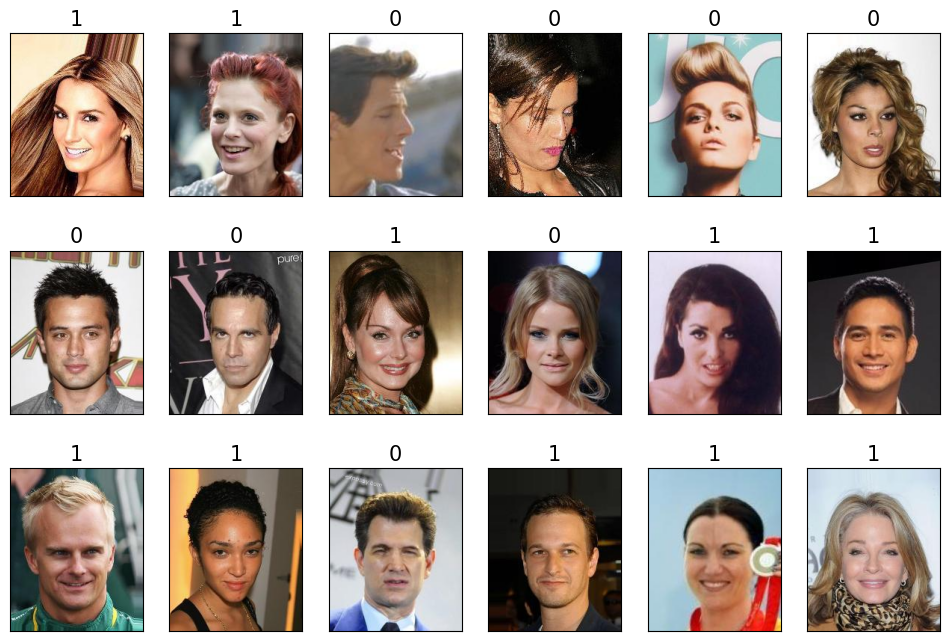

In [149]:
from itertools import islice

fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

plt.show()

##### MNIST数据集

In [150]:
image_path = "D:/python_code/7spyder_projects/2024celeba/mnist"

mnist_dataset = torchvision.datasets.MNIST(image_path, 
                                           'train', download=False)

In [151]:
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

In [152]:
example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x271B9D0DAF0>, 5)


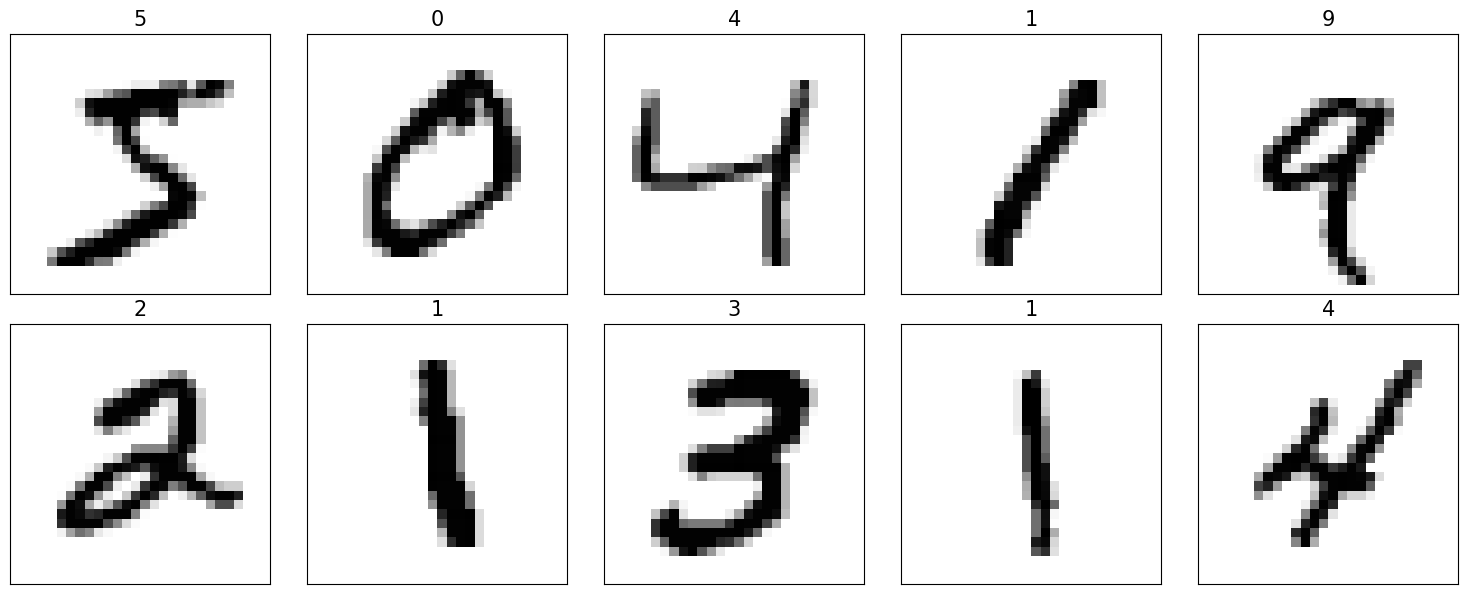

In [153]:
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

plt.tight_layout()
plt.show()

#### 使用Pytorch创建神经网络模型

##### 手动参数更新优化

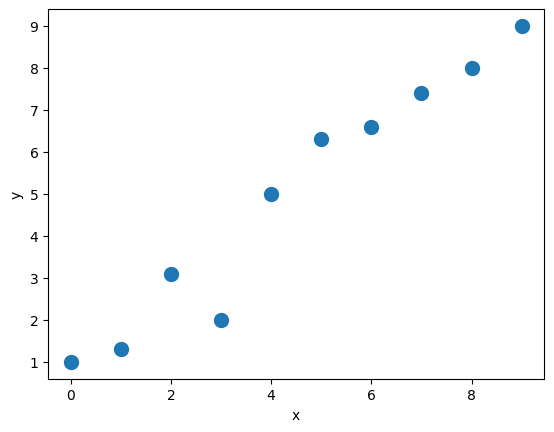

In [154]:
# 创建一个数据集.
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [155]:
# 标准化特征并创建Pytorch Dataset.
from torch.utils.data import TensorDataset

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [156]:
# 定义线性回归模型.
torch.manual_seed(1)

# 使用torch.randn(1)生成一个随机的权重参数，并设置其requires_grad_属性为True，以便在训练过程中计算梯度.
weight = torch.randn(1)
weight.requires_grad_()

# 使用torch.zeros(1)生成一个值为0的偏置参数，并设置其requires_grad属性为True，以便在训练过程中计算梯度.
bias = torch.zeros(1, requires_grad=True)

# 定义一个简单的线性回归模型，其中xb是输入的特征向量，@表示矩阵乘法，实现特征和权重的线性组合，然后加上偏置.
def model(xb):
    return xb @ weight + bias


In [157]:
# 定义损失函数.
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [158]:
# 设置关键训练超参数.
learning_rate = 0.001  # 学习率.
num_epochs = 200  # 训练轮数.
log_epochs = 10  # 每隔多少轮打印一次日志.

# 迭代训练循环
for epoch in range(num_epochs):  # 遍历每一个训练轮次.
    for x_batch, y_batch in train_dl:  # 从训练数据加载一个批次的数据进行训练.
        pred = model(x_batch)  # 使用模型进行预测.
        loss = loss_fn(pred, y_batch.long())  # 计算预测值与真实标签之间的损失.
        
        loss.backward()  # 反向传播计算梯度.

    with torch.no_grad():  # 使用torch.no_grad()上下文管理器，避免梯度计算的跟踪.
        weight -= weight.grad * learning_rate  # 根据梯度和学习率更新权重.
        bias -= bias.grad * learning_rate  # 根据梯度和学习率更新偏置.
        weight.grad.zero_()  # 清零权重的梯度.
        bias.grad.zero_()  # 清零偏置的梯度.

    if epoch % log_epochs==0:  # 如果当前轮次可以被log_epochs整除，输出日志.
        print(f'Epoch {epoch} Loss {loss.item():.4f}')  # 打印当前轮次和损失值.


Epoch 0 Loss 41.2725
Epoch 10 Loss 24.4285
Epoch 20 Loss 1.0575
Epoch 30 Loss 15.1630
Epoch 40 Loss 12.5989
Epoch 50 Loss 5.0840
Epoch 60 Loss 0.7865
Epoch 70 Loss 3.7489
Epoch 80 Loss 2.4036
Epoch 90 Loss 0.4430
Epoch 100 Loss 1.1155
Epoch 110 Loss 1.3195
Epoch 120 Loss 0.1064
Epoch 130 Loss 0.5676
Epoch 140 Loss 0.2216
Epoch 150 Loss 1.4862
Epoch 160 Loss 0.0483
Epoch 170 Loss 0.0061
Epoch 180 Loss 0.0016
Epoch 190 Loss 0.0294


In [159]:
# 查看模型参数.
print('Final Parameters: ', weight.item(), bias.item())

Final Parameters:  2.645277738571167 4.715577602386475


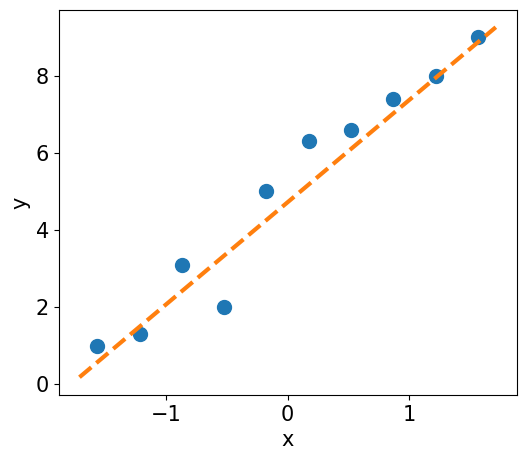

In [160]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)
"""
 在这里,detach() 是一个 PyTorch 函数,用于从计算图中分离张量，使其成为一个独立的张量，
 不再与计算图有关联。这意味着在这种情况下,y_pred 将不再保留与模型的梯度相关联，它将成为一个普通的 NumPy 数组.  
"""
y_pred = model(X_test_norm).detach().numpy()

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)

plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

##### 使用torch.nn和torch.optim模块

In [161]:
"""
在上述代码中，自定义了损失函数并利用梯度下降方法更新参数.
torch.nn模块中包含有很多损失函数, 同时torch.optim支持多样化的优化方法.
"""
import torch.nn as nn

input_size = 1
output_size = 1

loss_fn = nn.MSELoss(reduction='mean')

model = nn.Linear(input_size, output_size)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [162]:
# 调用step()方法来训练模型.
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 预测得到输出.
        pred = model(x_batch)[:, 0]
        # 计算损失.
        loss = loss_fn(pred, y_batch)
        # 计算梯度并反向传播.
        loss.backward()

        # 参数更新.
        optimizer.step()
        # 梯度归零.
        optimizer.zero_grad()

    if epoch % log_epochs == 0:
        # item用于提取出张量中的标量数值.
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 24.6684
Epoch 10 Loss 29.1377
Epoch 20 Loss 20.9207
Epoch 30 Loss 0.1257
Epoch 40 Loss 12.4922
Epoch 50 Loss 1.7845
Epoch 60 Loss 7.6425
Epoch 70 Loss 2.5606
Epoch 80 Loss 0.0157
Epoch 90 Loss 0.7548
Epoch 100 Loss 0.8412
Epoch 110 Loss 0.4923
Epoch 120 Loss 0.0823
Epoch 130 Loss 0.0794
Epoch 140 Loss 0.0891
Epoch 150 Loss 0.0973
Epoch 160 Loss 0.1043
Epoch 170 Loss 0.1103
Epoch 180 Loss 0.0009
Epoch 190 Loss 0.0764


In [163]:
print('Final parameters:', model.weight.item(), model.bias.item())

Final parameters: 2.6496422290802 4.87706995010376


##### 构建一个多层感知机

In [164]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

In [165]:
# 数据标准化.
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

"""

from torch.utils.data import Dataset, DataLoader

    # 自定义数据集类
class CustomDataset(Dataset):

    def __init__(self):
        # 初始化数据集
        pass
    
    def __getitem__(self, index):
        # 返回数据和标签
        pass
    
    def __len__(self):
        # 返回数据集长度
        pass

    # 创建数据集实例
dataset = CustomDataset()

    # 创建DataLoader来批量加载数据
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

"""


In [166]:
torch.manual_seed(1)
batch_size=2

train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [167]:
# 定义两层神经网络.
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    # 前向传递.
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

In [168]:
# 定义损失criteria和优化器optimizer.
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [169]:
# 定义训练循环.
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 模型预测.
        pred = model(x_batch)
        # 计算损失.
        loss = loss_fn(pred, y_batch.long())
        # 反向传播.
        loss.backward()
        # 参数更新.
        optimizer.step()
        # 梯度归零.
        optimizer.zero_grad()
        
        # 损失存储到列表.
        loss_hist[epoch] += loss.item() * y_batch.size(0)

        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

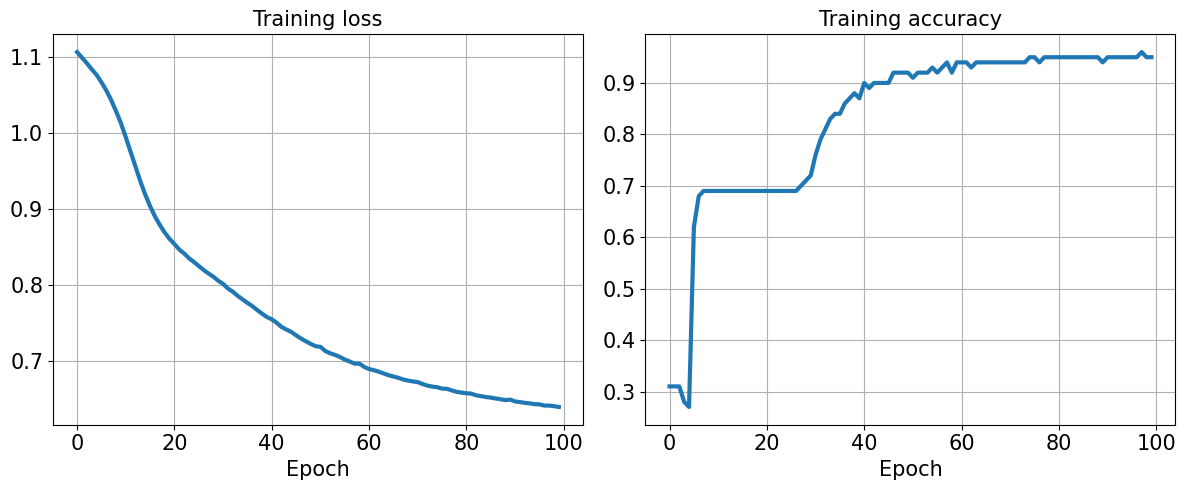

In [173]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
"""
ax.tick_params(axis='both', which='major', labelsize=15)
将横轴和纵轴的主要刻度标签的字体大小设置为 15 像素，以增强可视化效果，并使得图表上的刻度标签更易于阅读.
"""
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(True) 

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(True)   # 添加网格线.
plt.tight_layout()
plt.show()

##### 在测试集上进行模型评估

In [174]:
# 对X_test进行同样的归一化处理.
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm).float()

y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test accuracy is {accuracy:.4f}')

Test accuracy is 0.9800


##### 模型保存